<a href="https://colab.research.google.com/github/GabyPaolaING/Machine-Learning/blob/main/Regresi%C3%B3n_polin%C3%B3mica_una_gu%C3%ADa_completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión polinómica: una guía completa

## 2.1  Fundamentos de la técnica  

La regresión polinómica es una extensión de la regresión lineal que permite modelar la relación entre las variables dependientes e independientes como un polinomio de grado n. Esta técnica es especialmente útil cuando los datos muestran una relación no lineal que una regresión lineal simple no puede capturar eficazmente.

## 2.2 Modelo Matemático de la técnica

La ecuación de regresión polinómica viene dada por:

In [5]:
from IPython.display import display, Math

display(Math(r"y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \dots + \beta_n x^n + \varepsilon"))
display(Math(r"\text{donde:}"))
display(Math(r"y: \text{ variable dependiente}"))
display(Math(r"x: \text{ variable independiente}"))
display(Math(r"\beta_0, \beta_1, \dots, \beta_n: \text{ coeficientes del polinomio}"))
display(Math(r"\varepsilon: \text{ término de error}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 2.3  Descripción de la librería, clases, funciones y su parámetros  (python)

El artículo usa (o menciona) las siguientes librerías y clases:

numpy — para manejo de arreglos.


matplotlib.pyplot — para graficar.


sklearn.datasets.load_boston — para cargar el dataset Boston.


sklearn.model_selection.train_test_split — para dividir los datos en entrenamiento y prueba.


sklearn.preprocessing.PolynomialFeatures — para generar las características polinómicas.


sklearn.linear_model.LinearRegression — para entrenar el modelo.
sklearn.metrics.mean_squared_error, r2_score — para evaluar el modelo.


No todos los parámetros de esas funciones son explicados a fondo en el artículo; en tu notebook podrías agregar una breve descripción de los más relevantes, por ejemplo:

degree en PolynomialFeatures: indica el grado del polinomio (2, 3, etc.).

test_size en train_test_split: proporción de datos que irán al conjunto de prueba.

fit, predict de LinearRegression: entrenar y predecir.

## 2.4. Pipeline

 Preprocesamiento

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Simulamos un dataset (para evitar errores con load_boston)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # variable independiente
y = 2 + 1.5 * X + 0.5 * X**2 + np.random.randn(100, 1) * 2  # relación cuadrática + ruido

In [20]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Feature Engineering

In [21]:
# Generamos características polinómicas de grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

## Modelo Selection

## Model Training

In [22]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

##Prediction

In [23]:
# Predicción con el conjunto de prueba
y_pred = model.predict(X_test_poly)

##  Model Evaluation

Mean Squared Error: 2.5433624291283214
R^2 Score: 0.9935192342776877


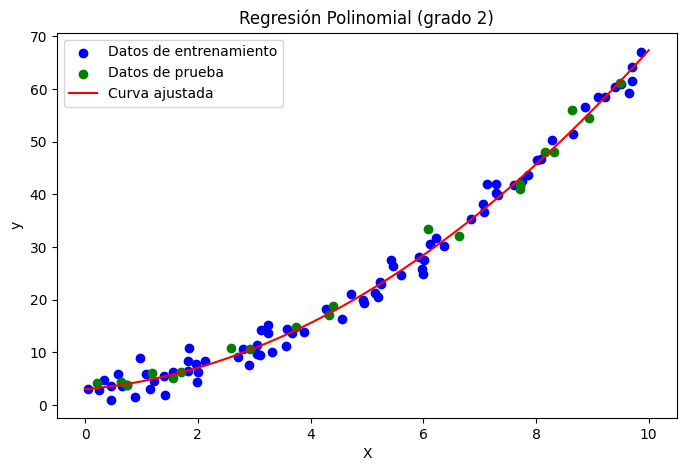

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos de prueba')


X_range = np.linspace(0, 10, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

plt.plot(X_range, y_range_pred, color='red', label='Curva ajustada')
plt.title('Regresión Polinomial (grado 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Interpretación de los resultados

Coeficientes : Los coeficientes β0,β1,…,βn\beta_0, \beta_1, …, \beta_nβ0​,β1​,…,βn​ indican la contribución de cada término polinomial.

Error cuadrático medio (EMM) : Mide la diferencia cuadrática media entre los valores reales y los previstos. Un valor bajo indica un mejor ajuste.

Puntuación R² : Indica la proporción de la varianza en la variable dependiente que es predecible a partir de la(s) variable(s) independiente(s). Un valor cercano a 1 indica un mejor ajuste.

##Conclusion

La regresión polinómica es una herramienta potente para modelar relaciones no lineales en los datos. Al transformar las características originales en características polinómicas, podemos ajustar una ecuación polinómica a los datos, capturando los patrones subyacentes con mayor eficacia. Los pasos y el código proporcionados en este blog le ayudarán a implementar la regresión polinómica en sus propios proyectos.



